In [64]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [77]:
#Read the dataset

df =pd.read_csv('Data.csv', encoding='ISO-8859-1')
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by Franc

In [3]:
#Check for null values

df.isnull().sum().any()

True

In [44]:
# Show the first few rows and column information to understand the structure
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

(None,
          Date  Label                                               Top1  \
 0  2000-01-03      0  A 'hindrance to operations': extracts from the...   
 1  2000-01-04      0                                          Scorecard   
 2  2000-01-05      0                  Coventry caught on counter by Flo   
 3  2000-01-06      1                      Pilgrim knows how to progress   
 4  2000-01-07      1                               Hitches and Horlocks   
 
                                  Top2  \
 0                           Scorecard   
 1                 The best lake scene   
 2  United's rivals on the road to Rio   
 3                 Thatcher facing ban   
 4      Beckham off but United survive   
 
                                             Top3  \
 0                Hughes' instant hit buoys Blues   
 1                  Leader: German sleaze inquiry   
 2  Thatcher issues defence before trial by video   
 3        McIlroy calls for Irish fighting spirit   
 4              

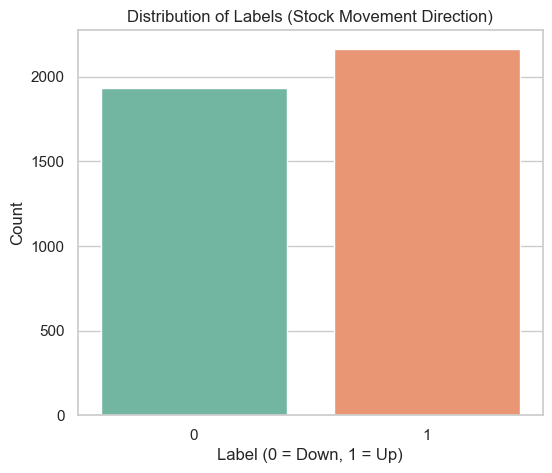

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count plot for the labels
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Label", palette="Set2")
plt.title("Distribution of Labels (Stock Movement Direction)")
plt.xlabel("Label (0 = Down, 1 = Up)")
plt.ylabel("Count")
plt.show()


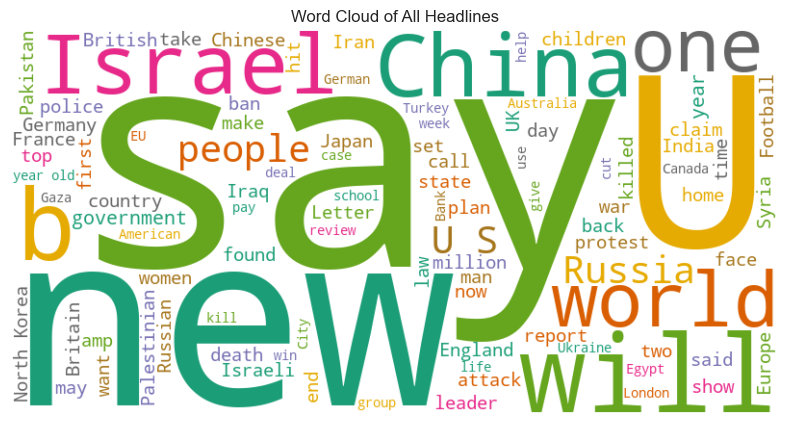

In [42]:
from wordcloud import WordCloud

# Combine all the headlines into one string for word cloud generation
headlines = df[[f"Top{i}" for i in range(1, 26)]].fillna("").values
all_headlines = " ".join([" ".join(headline) for headline in headlines])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Dark2", max_words=100).generate(all_headlines)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Headlines")
plt.show()


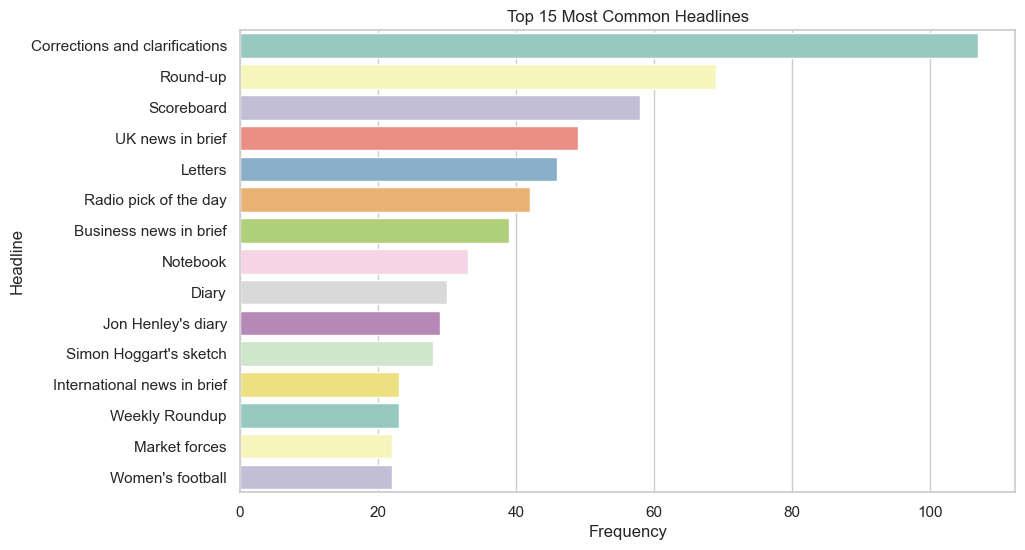

In [43]:
from collections import Counter

# Flatten all headlines into a single list
flattened_headlines = [headline for sublist in headlines for headline in sublist]

# Count occurrences of each headline
headline_counter = Counter(flattened_headlines)

# Select the top 15 most common headlines
most_common_headlines = headline_counter.most_common(15)

# Convert to a DataFrame for easy plotting
headline_df = pd.DataFrame(most_common_headlines, columns=["Headline", "Frequency"])

# Plot the most common headlines
plt.figure(figsize=(10, 6))
sns.barplot(data=headline_df, x="Frequency", y="Headline", palette="Set3")
plt.title("Top 15 Most Common Headlines")
plt.xlabel("Frequency")
plt.ylabel("Headline")
plt.show()


## Data Preprocessing

In [78]:
# Divide the data in train and test

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3975, 27), Test size: (378, 27)


In [6]:
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
# Remove non-alphabetic characters and replace them with spaces in both training and test datasets

train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [9]:
new_columns = [str(i) for i in range(0,24)]
train.columns = new_columns
test.columns = new_columns

In [10]:
# Convert columns in 'new_columns' to lowercase in both train and test sets

for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [11]:
# Concatenate the first 25 columns of each row into single strings for both training and test datasets

train_headlines = []
test_headlines = []
for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [12]:
# Preprocess the text data in train_headlines by removing stopwords and performing stemming

ps = PorterStemmer()
train_corpus = []
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

In [13]:
# Preprocess the text data in test_headlines by removing stopwords and performing stemming

test_corpus = []
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

In [14]:
# Convert the text data in train_corpus into a bag-of-words representation with a maximum of 10,000 features and bi-grams

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [15]:
X_test = cv.transform(test_corpus).toarray()

## Logistic regression

In [66]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [67]:
lr_y_pred = lr_classifier.predict(X_test)

In [68]:
# Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
score4 = f1_score(y_test, lr_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 score is: {}".format(round(score4,2)))

Accuracy score is: 84.92%
Precision score is: 0.86
Recall score is: 0.84
F1 score is: 0.85


In [69]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
conf_matrix

array([[160,  26],
       [ 31, 161]])

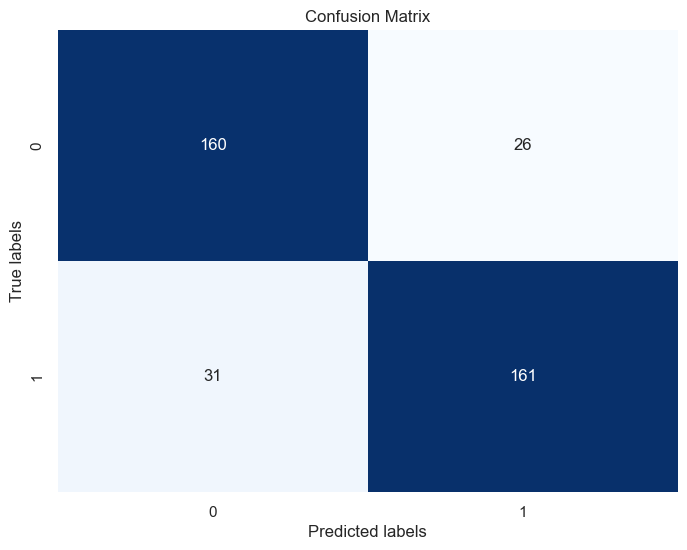

In [61]:
# Confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, lr_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

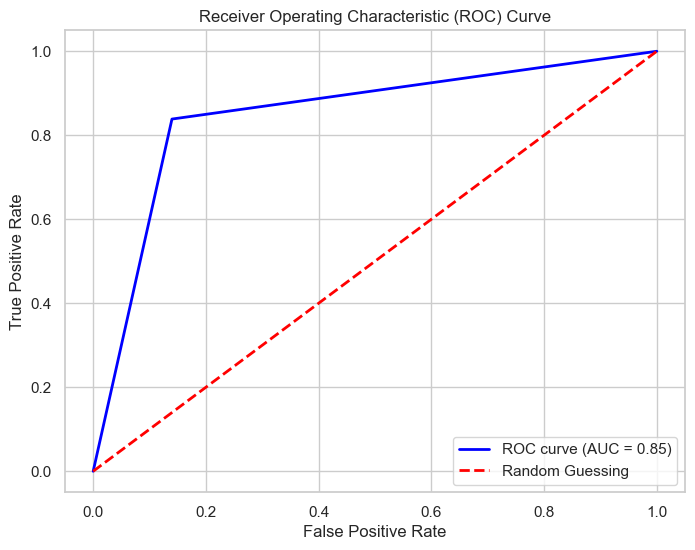

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted probabilities or decision function scores
fpr, tpr, thresholds = roc_curve(y_test, lr_y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [24]:
rf_y_pred = rf_classifier.predict(X_test)

In [47]:
#Evaluation

score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
score4 = f1_score(y_test, rf_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 Score is: {}".format(round(score4,2)))

Accuracy score is: 83.86%
Precision score is: 0.82
Recall score is: 0.88
F1 Score is: 0.85


In [26]:
conf_matrix = confusion_matrix(y_test, rf_y_pred)

array([[148,  38],
       [ 23, 169]])

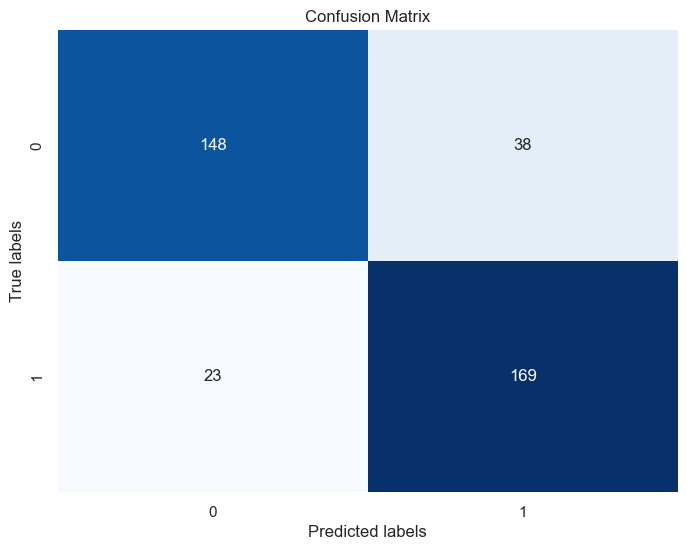

In [59]:
#Confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

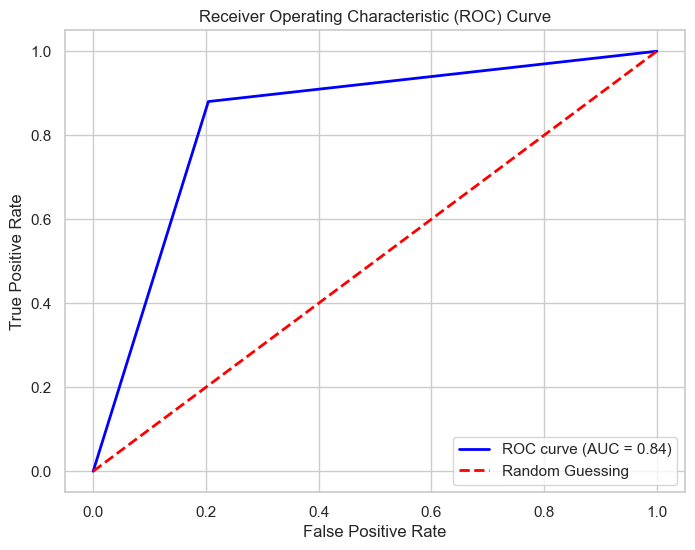

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted probabilities or decision function scores
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [38]:
nb_y_pred = nb_classifier.predict(X_test)

In [46]:
# Evaluation

score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
score4 = f1_score(y_test, nb_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 score is: {}".format(round(score4,2)))

Accuracy score is: 83.6%
Precision score is: 0.84
Recall score is: 0.83
F1 score is: 0.84


In [54]:
conf_matrix = confusion_matrix(y_test, nb_y_pred)
conf_matrix

array([[156,  30],
       [ 32, 160]])

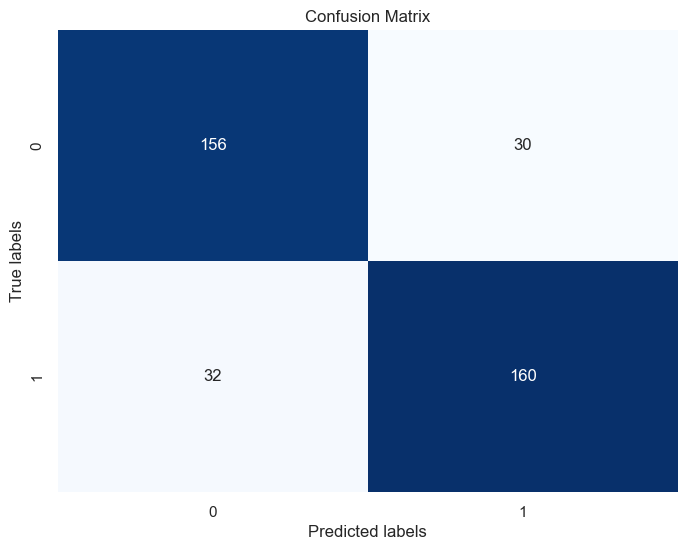

In [58]:
# Confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, nb_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Saving the Test Data

In [112]:
# Save the DataFrame to a CSV file
test.to_csv('test_data.csv', index=False)  # Set index=False not to save the index

## My two best trained models are Logistic Regression and Random Forest